# Příklad - spropitné

[Data](http://vincentarelbundock.github.io/Rdatasets/doc/reshape2/tips.html) z roku 1995 o výše spropitného v jedné restauraci v USA

Data obsahují 244 a 7 proměnných:
- Spropitné v dolarech (`tip`)
- Útrata v dolarech (`total_bill`)
- Pohlaví platce účtu (`sex`)
- Jsou ve skupině kuřáci? (`smoker`)
- Den v tydnu (`day`)
- Čas (`time`) - oběd nebo večeře
- Velikost skupiny (`size`)


## Seznámení s daty

In [1]:
# Importování knihoven
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Následujicí řádek je potřeba pro zobrazení matplotlib grafů v Jupyter notebooku
%matplotlib inline 

# Nastavit styl grafu
plt.style.use('seaborn')

In [2]:
# Načtení dat
data = sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# V jakém formátu jsou sloupce?
data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [4]:
# Kolik je řádků a sloupců?
data.shape

(244, 7)

In [5]:
# Které sloupce mají chybějící hodnoty?
data.columns[data.isnull().any()]

Index([], dtype='object')

In [6]:
# Udělat popisnou statistiku dat
data.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## Data

Chceme zjistit závislost spropitného na různých proměnných.

Budeme vizualizovat jenom ty proměnné, kde vidíme nějakou větší závislost.

Pro kategorické proměnné použijeme `groupby`, pro numerické - korelaci (`corr`)



In [7]:
# Velikost spropitného v závislosti na pohlaví
data.groupby('sex').tip.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [8]:
# Spočítáme t-test, abychom se rozhodli, zda je rozdíl statisticky významný
from scipy.stats import ttest_ind

cat1 = data[data.sex =='Female']
cat2 = data[data.sex =='Male']

ttest_ind(cat1.tip, cat2.tip)

Ttest_indResult(statistic=-1.3878597054212687, pvalue=0.16645623503456763)

In [9]:
# Velikost spropitného v závislosti na tom, zda jsou ve skupině kuřáci
data.groupby('smoker').tip.mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [10]:
from scipy.stats import ttest_ind

cat1 = data[data.smoker =='No']
cat2 = data[data.smoker =='Yes']

ttest_ind(cat1.tip, cat2.tip)

Ttest_indResult(statistic=-0.09222805186888201, pvalue=0.9265931522244976)

In [11]:
# Velikost spropitného v závislosti na čase jídla
data.groupby('time').tip.mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [12]:
from scipy.stats import ttest_ind

cat1 = data[data.time =='Lunch']
cat2 = data[data.time =='Dinner']

ttest_ind(cat1.tip, cat2.tip)

Ttest_indResult(statistic=-1.9062569301202392, pvalue=0.05780153475171558)

In [13]:
# Velikost spropitného v závislosti na dni
data.groupby('day').tip.mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [14]:
# Vytvoříme koreláční matici pro numerické proměnné
data.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


## Mapování

Budeme vizualizovat výše spropitného (`tip`, spojítá proměnná) v závislosti na těchto proměnných:

- Den v týdnu (`day`) - kategorická proměnná
- Pohlaví platce účtu (`sex`) - kategorická proměnná
- Čas placení učtu (`time`) - kategorická proměnná
- Velikost skupiny hostů (`size`) - ordinální proměnná
- Útrata v dolarech (`total_bill`) - spojítá proměnná


### První graf:
X-`day`, Y - `tip`, barva - `sex`

### Druhý graf:
X-`total_bill`, Y - `tip`

### Třetí graf
X - `time`, Y - `tip` 

### Čtvrtý graf
X - `size`, Y - `tip` 

# Geometrické objekty

Rozhodnout, jaké grafy použit podle toho, jestli chci ukázat:

- Distribuci hodnot jedné proměnné
- Vztah dvou spojitých proměnných
- Vztah kategorické a spojité proměnné
- Vztah dvou kategorických proměnných

### První graf:
- X-`day`, Y - `tip`, barva - `sex`
- Bodový (`sns.catplot`)

### Druhý graf:
- X-`total_bill`, Y - `tip`
- Bodový (`sns.regplot`)

### Třetí graf
- X - `time`, Y - `tip`
- Krabicový (`sns.boxenplot`)

### Čtvrtý graf
- X - `size`, Y - `tip` 
- Sloupcový (`plt.bar`)

# Transformace

- Podívat na rozsah dat

In [15]:
# Pro každý sloupec zobrazit popisnou statistiku
data.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Z popisné statistiky lze vidět, že spojite proměnné mají zhrůba stejný rozsah hodnot. Data neobsahují chybějící hodnoty. Proto alespoň prozatím data nechám v původním stavu.

In [16]:
# Abychom zobrazili sloupcový graf, potřebujeme zagregovat data
data.groupby('size').tip.mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

## Stupnice

V prvním grafu (x - `day`, y - `tip`) použijeme barvu k rozdělení spropitného zaplaceného muži a ženami

## Statistika

Ve druhém grafu zobrazíme meze spolehlivosti a regresní přímku.

In [17]:
# První graf
def first_plot():
    g = sns.catplot(x='day', y='tip', hue='sex', data=data, palette="dark", height=9, aspect=9/6, s=15, alpha=0.7)
    plt.title('Velikost spropitného v závislosti na dni v týdnu', fontdict=dict(fontsize=20))
    plt.xlabel('Den v týdnu', fontdict=dict(fontsize=20))
    plt.ylabel('Spropitné, USD', fontdict=dict(fontsize=20))
    g._legend.set_title('Pohlaví')
    new_labels = ['Muž', 'Žena']
    g.set_xticklabels(['Čtvrtek', 'Pátek', 'Sobota', 'Neděle'], fontdict=dict(fontsize=20))
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    

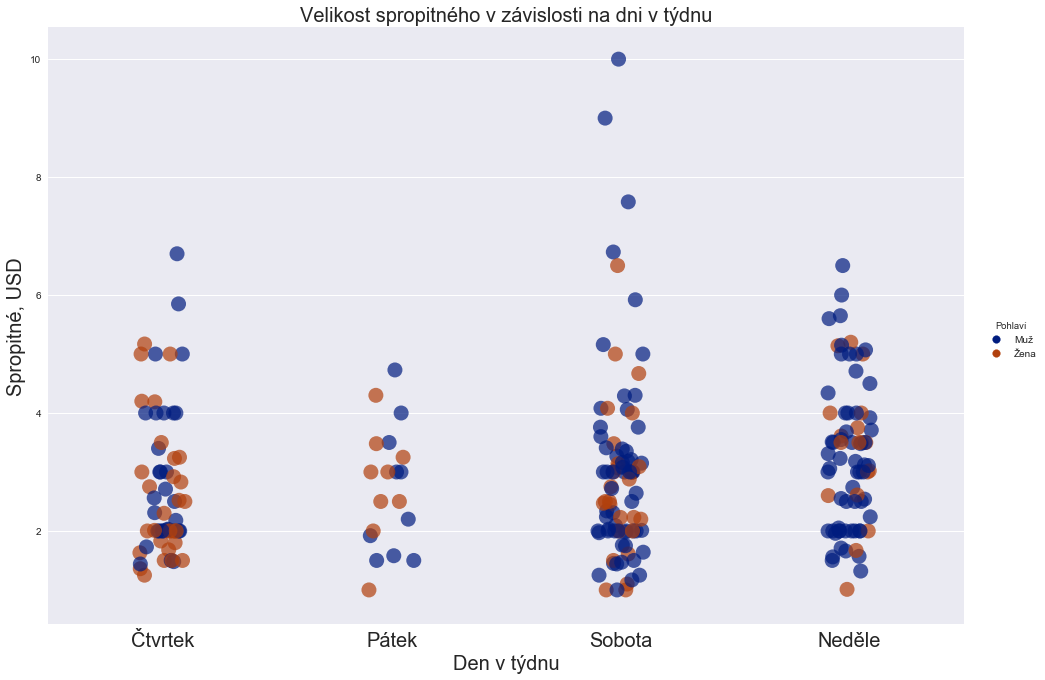

In [18]:
first_plot()

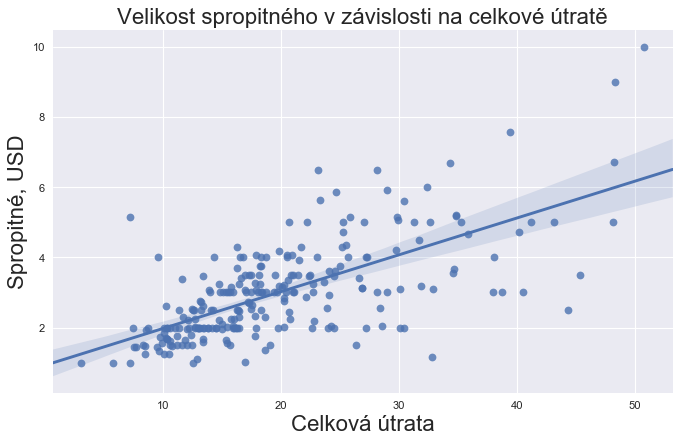

In [19]:
# Druhý graf
fig, ax = plt.subplots(figsize=(10, 6), dpi= 80)
sns.regplot(x='total_bill', y='tip', data=data)
plt.title('Velikost spropitného v závislosti na celkové útratě', fontdict=dict(fontsize=20))
plt.xlabel('Celková útrata', fontdict=dict(fontsize=20))
plt.ylabel('Spropitné, USD', fontdict=dict(fontsize=20))
plt.show()

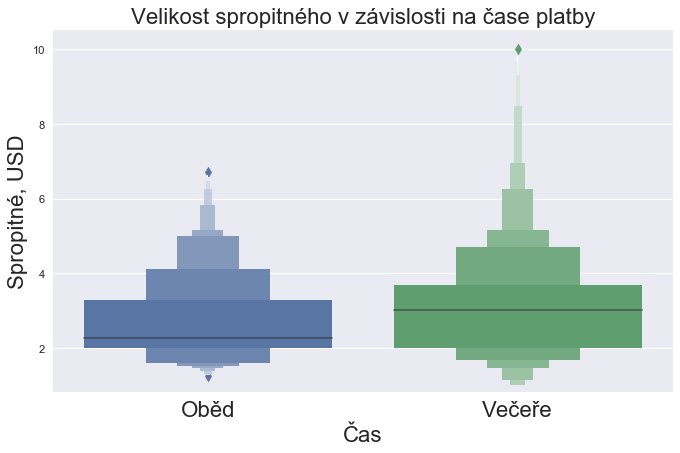

In [20]:
fig, ax = plt.subplots(figsize=(10, 6), dpi= 80)
sns.boxenplot(x='time', y='tip', data=data)
plt.title('Velikost spropitného v závislosti na čase platby', fontdict=dict(fontsize=20))
plt.xlabel('Čas', fontdict=dict(fontsize=20))
plt.ylabel('Spropitné, USD', fontdict=dict(fontsize=20))
ax.set_xticklabels(['Oběd', 'Večeře'], fontdict=dict(fontsize=20))
plt.show()

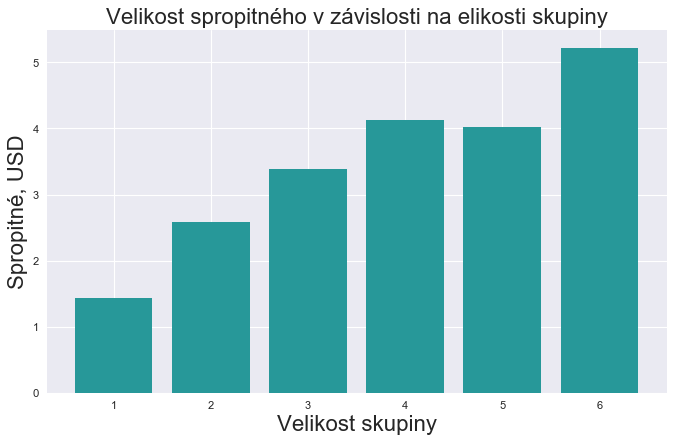

In [21]:
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
plt.bar(x=data.groupby('size').tip.mean().index, height=data.groupby('size').tip.mean(), color='#279899')
plt.title('Velikost spropitného v závislosti na elikosti skupiny', fontdict=dict(fontsize=20))
plt.xlabel('Velikost skupiny', fontdict=dict(fontsize=20))
plt.ylabel('Spropitné, USD', fontdict=dict(fontsize=20))
matplotlib.rcParams.update({'font.size': 22})
plt.show()